In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###**CTN 1** - Octubre 25, 2021

###**CTN 2** - Octubre 30, 2021

###**CTN 3** - Noviembre 17, 2021

###**CTN 4** - Noviembre 22, 2021

#Cálculos

$$ \%L = \frac{I_P - I_L}{I_T - I_L} \times 100 \% $$


In [7]:
def leerArchivo(nombre_archivo):
  data = open(nombre_archivo,errors='ignore')
  datos = data.readlines()[25:]
  tiempo = np.zeros(len(datos))
  intensidad = np.zeros(len(datos))
  error_intensidad  = np.zeros(len(datos))

  for i in range(0,len(datos)):
    a = datos[i]
    t = float(a.split('\t')[1])
    err = a.split('\t')[2][:29].split(' ')[-1]
    intens = a.split('\t')[2][:16].split(' ')[-1]
    tiempo[i], intensidad[i], error_intensidad[i] = t, intens, err

  return tiempo, intensidad/max(intensidad), error_intensidad/max(intensidad)

In [8]:
# nombre_archivo - Nombre del archivo en el repositorio - Ej: "01 Liposomas a 37 grados.ifx"
def calcularL(nombre_archivo, lipo_inicial, lipo_final, pepti_inicial, pepti_final, triton_inicial, triton_final, titulo):
  ps = 30
  colors = ['blue','orange','green']
  fig,ax = plt.subplots(1,len(nombre_archivo),figsize=(20*len(nombre_archivo)/3,5))
  L = np.zeros(len(nombre_archivo))
  for i in range(0,len(nombre_archivo)):
    c1 = colors[i]
    tiempo, intensidad,error_intensidad = leerArchivo(nombre_archivo[i])
    ax[i].errorbar(tiempo,intensidad,yerr=error_intensidad,fmt='-',c=c1,label='Intento '+str(i+1))
    ax[i].set(xlabel="Tiempos [s]", ylabel="Intensidad [u.a.]")
    ax[i].scatter(tiempo[lipo_inicial[i]:lipo_final[i]],intensidad[lipo_inicial[i]:lipo_final[i]],c=c1,s=ps)
    ax[i].scatter(tiempo[pepti_inicial[i]:pepti_final[i]],intensidad[pepti_inicial[i]:pepti_final[i]],c=c1,s=ps)
    ax[i].scatter(tiempo[triton_inicial[i]:triton_final[i]],intensidad[triton_inicial[i]:triton_final[i]],c=c1,s=ps)
    ax[i].set_title(titulo)
    ax[i].legend()
    L[i] = 100*(np.average(intensidad[pepti_inicial[i]:pepti_final[i]])-np.average(intensidad[lipo_inicial[i]:lipo_final[i]]))/(np.average(intensidad[triton_inicial[i]:triton_final[i]])-np.average(intensidad[lipo_inicial[i]:lipo_final[i]]))
  


  plt.savefig(titulo+'.pdf')
  

  return np.average(L), np.std(L)

In [9]:
def sigmoid(x,a,h,k):
  y = np.divide(1,1+np.exp(np.multiply(a,np.add(x,h))))
  return np.multiply(100,y+k)

In [10]:
def graficar(Lctn, errorLctn, cctn, ctn, p0):
  for i in range(0,len(Lctn)):
    if Lctn[i]>100:
      Lctn[i] = 100
    cctn = np.divide(cctn,30)
  plt.errorbar(cctn,Lctn,yerr=errorLctn,fmt='o')
  #plt.xlabel('Concentración de '+ctn+' [$\mu$M]')
  #popt, pcov = curve_fit(sigmoid, cctn, Lctn, p0)
  t=np.linspace(min(cctn),max(cctn))
  #y = sigmoid(t,*popt)
  y2 = sigmoid(t,*p0)
  plt.plot(t,y)
  plt.plot(t,y2)
  plt.xscale('log')
  plt.xlabel('Logaritmo de P/L')
  plt.ylabel('Porcentaje de fuga de calceína')
  plt.title('Porcentaje de fuga de calceína en \n función de logaritmo de P/L para '+ctn)
  plt.savefig('0'+ctn+'.pdf')
  plt.grid(True)
  return cctn, Lctn, popt

##***Ctn1***

In [11]:
Lctn1 = []
errorlctn1 = []
cctn1 = []

FileNotFoundError: [Errno 2] No such file or directory: '01 B + L.ifx'

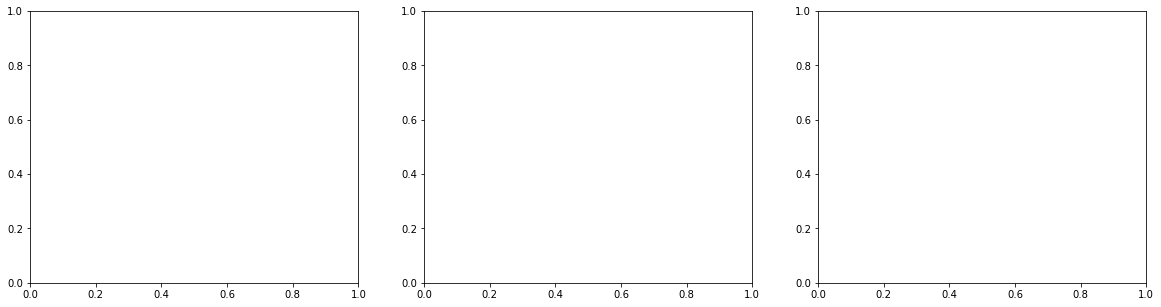

In [13]:
#c=0mM
L, errorL = calcularL(["01 B + L.ifx","02 B + L - r1.ifx","03 B + L - r2.ifx"],[23,14,19],[43,29,31],[23,14,19],[43,29,31],[50,31,34],[53,54,54],"Intensidad en función de tiempo de buffer y liposomas")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
cctn1.append(0)

In [ ]:
#c=1mM
L, errorL = calcularL(["13 B + L + P(b) + T .ifx","14 B + L + P(b) + T .ifx"],[5,8],[25,23],[31,26],[42,39],[45,42],[63,62],"Intensidad en función de tiempo \n de buffer, liposomas y 1mM de Ctn1")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
#1000uM*2uL/1000uL
cctn1.append(1000*2/1000)

In [ ]:
#c=100uM
L, errorL = calcularL(["18B + L + P(c) + T.ifx","20B + L + P(c) + T.ifx"],[5,5],[17,19],[32,25],[44,35],[47,39],[63,62],"Intensidad en función de tiempo \n de buffer, liposomas y 100$\mu$M de Ctn1")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
#100uM*2uL/1000uL
cctn1.append(100*2/1000)

In [ ]:
#c=10uM
L, errorL = calcularL(["21B + L + P(d) + T.ifx","22B + L + P(d) + T.ifx","23B + L + P(d) + T.ifx"],[24,17,10],[32,28,20],[36,32,26],[49,40,38],[52,45,45],[54,62,53],"Intensidad en función de tiempo \n de buffer, liposomas y 10$\mu$M de Ctn1")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
#10uM*2uL/1000uL
cctn1.append(10*2/1000)

In [ ]:
#c=1uM
L, errorL = calcularL(["24B + L + P(e) + T.ifx","25B + L + P(e) + T.ifx","26B + L + P(e) + T.ifx"],[10,10,10],[22,17,16],[25,20,21],[33,32,34],[42,38,37],[52,62,53],"Intensidad en función de tiempo \n de buffer, liposomas y 1$\mu$M de Ctn1")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
#1uM*2uL/1000uL
cctn1.append(1*2/1000)

In [ ]:
#c=0.1uM
L, errorL = calcularL(["28B + L + P(f) + T.ifx","29B + L + P(f) + T.ifx","30B + L + P(f) + T.ifx"],[5,10,8],[11,27,18],[14,31,21],[26,43,33],[32,46,37],[52,62,53],"Intensidad en función de tiempo \n de buffer, liposomas y 0.1$\mu$M de Ctn1")
print(L, errorL)
Lctn1.append(L)
errorlctn1.append(errorL)
#0.1uM*2uL/1000uL
cctn1.append(0.1*2/1000)

print(Lctn1, cctn1)

$$ C_{cub} = \frac{C_{péptido}V_{péptido}}{V_{cubeta}} $$

##***Ctn2***

In [ ]:
Lctn2 = []
errorlctn2 = []
cctn2 = []

In [ ]:
#c=0uM
L, errorL = calcularL(["1 B + L + J.ifx","2 B + L + J.ifx"],[13,14,19],[43,29,31],[13,14,19],[43,29,31],[50,31,34],[53,54,54],"Intensidad en función de tiempo de buffer y liposomas")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#0*2uL/1000uL
cctn2.append(0)

In [ ]:
#c=10mM
L, errorL = calcularL(["3 B + L + P(10mM) + J.ifx","4 B + L + P(10mM) + J.ifx","5 B + L + P(10mM) + J.ifx"],[7,5,7],[24,23,27],[26,25,31],[43,45,45],[49,46,47],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 10mM de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#10000uM*5uL/1000uL
cctn2.append(10000*5/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["6 B + L + P(1mM) + J.ifx","7 B + L + P(1mM) + J - 1.ifx","8 B + L + P(1mM) + J - 2.ifx"],[7,8,7],[22,31,23],[26,35,26],[43,46,42],[49,46,47],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 1mM de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#1000uM*5uL/1000uL
cctn2.append(1000*5/1000)

In [ ]:
#c=0.1mM
L, errorL = calcularL(["9 B + L + P(0.1mM) + J.ifx","10 B + L + P(0.1mM) + J - 1.ifx","12 B + L + P(0.1mM) + J - 2real.ifx"],[7,8,17],[22,29,37],[26,35,43],[43,44,53],[49,48,54],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 0.1mM de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#100uM*5uL/1000uL
cctn2.append(100*5/1000)

In [ ]:
#c=10uM
L, errorL = calcularL(["13 B + L + P(10uM) + J - 1.ifx","13 B + L + P(10uM) + J - 2.ifx","13 B + L + P(10uM) + J.ifx"],[7,15,20],[22,25,29],[26,35,39],[44,48,45],[49,51,47],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 10$\mu$M de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#10uM*5uL/1000uL
cctn2.append(10*5/1000)

In [ ]:
#c=1uM
L, errorL = calcularL(["14 B + L + P(1uM) + J .ifx","15 B + L + P(1uM) + J - 1.ifx","15 B + L + P(1uM) + J - 2.ifx"],[10,15,10],[17,25,20],[30,35,39],[44,44,45],[47,47,47],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 1$\mu$M de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#1uM*5uL/1000uL
cctn2.append(1*5/1000)

In [ ]:
#c=0.1uM
L, errorL = calcularL(["16 B + L + P(0.1uM) + J - 1.ifx","16 B + L + P(0.1uM) + J - 2.ifx"],[10,10,10],[17,25,20],[30,35,36],[44,42,42],[47,47,45],[69,66,66],"Intensidad en función de tiempo de buffer y liposomas \n de buffer, liposomas y 0.1$\mu$M de Ctn-2")
print(L, errorL)
Lctn2.append(L)
errorlctn2.append(errorL)
#0.1uM*5uL/1000uL
cctn2.append(0.1*5/1000)

print(Lctn2, cctn2)

##***Ctn3***

In [ ]:
Lctn3 = []
errorlctn3 = []
cctn3 = []

In [ ]:
#c=0
L, errorL = calcularL(["01 B + L .ifx","02 B + L .ifx","03 B + L .ifx"],[24,21,23],[44,41,53],[24,21,23],[44,41,53],[56,58,56],[76,78,66],"Intensidad en función de tiempo de buffer y liposomas")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#0uM*5uL/1000uL
cctn3.append(0*5/1000)

In [ ]:
#c=100mM
L, errorL = calcularL(["05 B + L + A(2ul) + T.ifx","06 B + L + A(2ul) + T - 1.ifx","07 B + L + A(2ul) + T - 2.ifx"],[0,0,0],[17,20,19],[21,23,21],[49,43,43],[52,54,46],[65,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 100mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#100000uM*2uL/1000uL
cctn3.append(100000*2/1000)

In [ ]:
#c=10mM
L, errorL = calcularL(["09 B + L + B(2ul) + T - 1.ifx","10 B + L + B(2ul) + T - 2.ifx"],[0,0],[18,19],[23,23],[43,48],[51,49],[65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 10mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#10000uM*2uL/1000uL
cctn3.append(10000*2/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["11 B + L + C(2ul) + T - 1.ifx","11 B + L + C(2ul) + T.ifx","12 B + L + C(2ul) + T - 2.ifx"],[0,0,0],[15,20,13],[21,23,21],[39,43,42],[45,50,44],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#1000uM*2uL/1000uL
cctn3.append(1000*2/1000)

In [ ]:
#c=0.1mM
L, errorL = calcularL(["13 B + L + D(2ul) + T.ifx","14 B + L + D(2ul) + T - 1.ifx","15 B + L + D(2ul) + T - 2.ifx"],[0,0,0],[14,16,13],[23,23,21],[41,39,44],[45,43,47],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#100uM*2uL/1000uL
cctn3.append(100*2/1000)

In [ ]:
#c=0.01mM
L, errorL = calcularL(["16 B + L + E(2ul) + T.ifx","17 B + L + E(2ul) + T - 1.ifx","18 B + L + E(2ul) + T - 2.ifx"],[0,0,0],[14,16,13],[23,23,21],[41,39,44],[45,46,48],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#10uM*2uL/1000uL
cctn3.append(10*2/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["19 B + L + C(4ul) + T - 1.ifx","19 B + L + C(4ul) + T.ifx"],[0,0],[14,15],[29,28],[47,44],[49,46],[67,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#1000uM*4uL/1000uL
cctn3.append(1000*4/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["20 B + L + C(3ul) + T.ifx","21 B + L + C(3ul) + T - 1.ifx"],[0,0],[18,20],[29,28],[50,54],[52,56],[67,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn3")
print(L, errorL)
Lctn3.append(L)
errorlctn3.append(errorL)
#1000uM*3uL/1000uL
cctn3.append(1000*3/1000)

print(Lctn3, cctn3)

##***Ctn4***

In [ ]:
Lctn4 = []
errorlctn4 = []
cctn4 = []

In [ ]:
#c=0
L, errorL = calcularL(["01 B + L + T.ifx","02 B + L + T - 1.ifx"],[23,29],[48,50],[23,29],[48,50],[50,54],[80,80],"Intensidad en función de tiempo de buffer y liposomas")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#0uM*3uL/1000uL
cctn4.append(0)

In [ ]:
#c=100mM
L, errorL = calcularL(["04 B + L + A(2ul) + T .ifx","06 B + L + A(2ul) + T - 1.ifx","07 B + L + A(2ul) + T - 2.ifx"],[0,0,0],[17,19,17],[29,23,21],[43,39,44],[45,53,46],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 100mM de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#100,000uM*2uL/1000uL
cctn4.append(100000*2/1000)

In [ ]:
#c=10mM
L, errorL = calcularL(["09 B + L + B(2ul) + T - 1.ifx","10 B + L + B(2ul) + T - 2.ifx"],[0,0],[18,18],[23,23],[44,50],[50,51],[65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 10mM de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#10000uM*2uL/1000uL
cctn4.append(10000*2/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["11 B + L + C(2ul) + T.ifx","12 B + L + C(2ul) + T - 1.ifx","13 B + L + C(2ul) + T - 2.ifx"],[0,0,0],[17,19,17],[29,23,21],[43,39,44],[45,53,46],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#1000uM*2uL/1000uL
cctn4.append(1000*2/1000)

In [ ]:
#c=0.1mM
L, errorL = calcularL(["14 B + L + D(2ul) + T.ifx","15 B + L + D(2ul) + T - 1.ifx","16 B + L + D(2ul) + T - 2.ifx"],[0,0,0],[17,18,17],[29,23,21],[43,44,44],[45,47,46],[67,65,65],"Intensidad en función de tiempo de \n buffer, liposomas y 100$\mu$M de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#100uM*2uL/1000uL
cctn4.append(100*2/1000)

In [ ]:
#c=0.01mM
L, errorL = calcularL(["17 B + L + E(2ul) + T.ifx","18 B + L + E(2ul) + T - 1.ifx"],[0,0],[17,18],[29,23],[43,41],[47,45],[67,65],"Intensidad en función de tiempo de \n buffer, liposomas y 10$\mu$M de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#10uM*2uL/1000uL
cctn4.append(10*2/1000)

In [ ]:
#c=1mM
L, errorL = calcularL(["19 B + L + C(5ul) + T - 1.ifx","20 B + L + C(5ul) + T.ifx"],[0,0],[17,18],[32,41],[46,59],[47,61],[67,67],"Intensidad en función de tiempo de \n buffer, liposomas y 1mM de Ctn4")
print(L, errorL)
Lctn4.append(L)
errorlctn4.append(errorL)
#1000uM*5uL/1000uL
cctn4.append(1000*5/1000)

print(Lctn4,cctn4)

##***Resultados Finales***

In [ ]:
h = 0.5*(np.log(cctn1[1])+np.log(cctn1[-1]))
a=4.414
k=-0.0200002001599
a,b,c=graficar(Lctn1, errorlctn1, cctn1, "Ctn1",[a,h,k])
print(Lctn1)
a

In [ ]:
graficar(Lctn2, errorlctn2, cctn2, "Ctn2",[a,h,k])

In [ ]:
graficar(Lctn3, errorlctn3, cctn3, "Ctn3",[a,h,k])

In [ ]:
graficar(Lctn4, errorlctn4, cctn4, "Ctn4",[a,h,k])

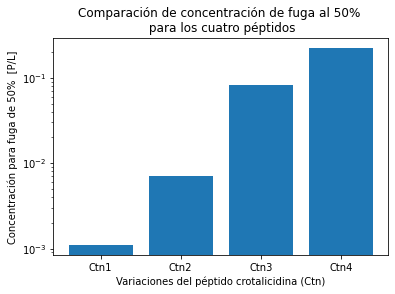

In [18]:
concentraciones = [0.00108736276072, 0.00709049588087, 0.0829099665752, 0.225327585515]
plt.yscale('log')
nombres = ['Ctn1', 'Ctn2','Ctn3','Ctn4']
plt.bar(nombres,concentraciones)
plt.xlabel("Variaciones del péptido crotalicidina (Ctn)")
plt.ylabel("Concentración para fuga de 50%  [P/L]")
plt.title("Comparación de concentración de fuga al 50% \n para los cuatro péptidos")
plt.savefig('0graficobar.pdf')